In [1]:
from attack import attack
from phase_search import phase_search
from get_mask import get_mask

import numpy as np
import matplotlib.pyplot as plt
from keras.applications.resnet_v2 import ResNet50V2
from keras.applications.resnet50 import decode_predictions
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
model = ResNet50V2(weights='imagenet')
image_size = 224

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


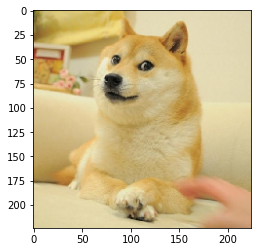

In [3]:
ori_img_path = "./doge.png"
ori_img = image.load_img(path=ori_img_path, target_size=(image_size, image_size))
ori_img_arr = image.img_to_array(ori_img)
ori_img_arr /= 255
prob_ori = model.predict(np.expand_dims(ori_img_arr, axis=0))
ori_img_label = np.argmax(prob_ori)
plt.imshow(ori_img_arr)

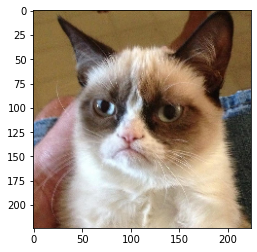

In [4]:
tgt_img_path = "./cat.png"
tgt_img = image.load_img(path=tgt_img_path, target_size=(image_size, image_size))
tgt_img_arr = image.img_to_array(tgt_img)
tgt_img_arr /= 255
prob_tgt = model.predict(np.expand_dims(tgt_img_arr, axis=0))
tgt_img_label = np.argmax(prob_tgt)
plt.imshow(tgt_img_arr)
target_label = tgt_img_label

In [5]:
print("ori_img_label: ", decode_predictions(prob_ori, top=1)[0])
print("tgt_img_label: ", decode_predictions(prob_tgt, top=1)[0])

ori_img_label:  [('n02113023', 'Pembroke', 0.4568863)]
tgt_img_label:  [('n02123597', 'Siamese_cat', 0.88002145)]


mid:  0.5
tmp_label:  [('n04589890', 'window_screen', 0.16568959)]
mid:  0.25
tmp_label:  [('n02123597', 'Siamese_cat', 0.9971534)]
mid:  0.375
tmp_label:  [('n02125311', 'cougar', 0.4545651)]
mid:  0.3125
tmp_label:  [('n02123597', 'Siamese_cat', 0.9907417)]
mid:  0.34375
tmp_label:  [('n02123597', 'Siamese_cat', 0.97589684)]
mid:  0.359375
tmp_label:  [('n02123597', 'Siamese_cat', 0.87615997)]
mid:  0.3671875
tmp_label:  [('n02123597', 'Siamese_cat', 0.705378)]
mid:  0.37109375


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tmp_label:  [('n02123597', 'Siamese_cat', 0.5673719)]


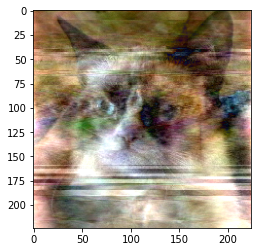

In [6]:
tgt_img_arr_shifted, flag = phase_search(ori_img_arr, tgt_img_arr, model, label=tgt_img_label)
plt.imshow(tgt_img_arr_shifted)

284
try alpha 0.05
tmp_label:  [('n02123597', 'Siamese_cat', 0.59122676)]
try alpha 0.1
tmp_label:  [('n02125311', 'cougar', 0.40743923)]
alpha is 0.05000000000000002



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


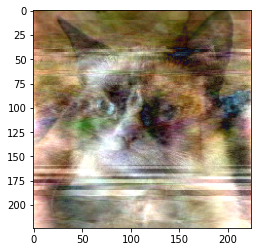

In [7]:
gama = 0.05
mask = get_mask(ori_img_arr, gama)
alpha = 0.05
left = tgt_img_arr_shifted
right = ori_img_arr
tmp_label = target_label
print(target_label)
while tmp_label == target_label and alpha <= 0.5:
    print("try alpha {}".format(alpha))
    tmp_img_arr_projected = (1 - mask) * (alpha * right + (1 - alpha) * left) + mask * left
    alpha += 0.05
    prob_target = model.predict(np.expand_dims(tmp_img_arr_projected, axis=0))
    tmp_label = np.argmax(prob_target)
    print("tmp_label: ", decode_predictions(prob_target, top=1)[0])
    left = tmp_img_arr_projected
target_label = tgt_img_label
alpha -= 0.1
print("alpha is {}\n".format(alpha))
tgt_img_arr_projected = (1 - mask) * (alpha * ori_img_arr + (1 - alpha) * tgt_img_arr_shifted) + mask * tgt_img_arr_shifted
plt.imshow(tgt_img_arr_projected)

In [8]:
init_num_evals = 100
max_num_evals = 1e4
adv_img_hsja = attack(
    model,
    ori_img_arr,
    method="hsja",
    mask=None,
    clip_max=1,
    clip_min=0,
    num_iterations=100,
    gamma=1.0,
    target_label=target_label,
    target_image=tgt_img_arr,
    max_num_evals=max_num_evals,
    init_num_evals=init_num_evals,
    image_size=image_size,
    max_query=8000,)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /mnt/data/files/vis/py-vis/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
original label:  [('n02113023', 'Pembroke', 0.4568863)]
target image label:  [('n02123597', 'Siamese_cat', 0.88002145)]


/mnt/data/files/IDBA/attack.py:111: UserWarning: DEPRECATED: skimage.measure.compare_ssim has been moved to skimage.metrics.structural_similarity. It will be removed from skimage.measure in version 0.18.
  ssim_j = compare_ssim(sample, perturbed, data_range=1, multichannel=True)
/mnt/data/files/IDBA/attack.py:112: UserWarning: DEPRECATED: skimage.measure.compare_psnr has been moved to skimage.metrics.peak_signal_noise_ratio. It will be removed from skimage.measure in version 0.18.
  psnr_j = compare_psnr(sample, perturbed, data_range=1)


iter: 1, q: 156, ssim: 0.5682, psnr: 15.8047, fsim: 0.8136, lpips: 0.2466, dist: 62.8885
iter: 2, q: 326, ssim: 0.4590, psnr: 15.8771, fsim: 0.7905, lpips: 0.2604, dist: 62.3671
iter: 3, q: 528, ssim: 0.4483, psnr: 16.5047, fsim: 0.7981, lpips: 0.2563, dist: 58.0193
iter: 4, q: 756, ssim: 0.3405, psnr: 16.2722, fsim: 0.7528, lpips: 0.3013, dist: 59.5932
iter: 5, q: 1007, ssim: 0.3267, psnr: 16.8170, fsim: 0.7512, lpips: 0.3093, dist: 55.9707
iter: 6, q: 1279, ssim: 0.3088, psnr: 17.0460, fsim: 0.7416, lpips: 0.3251, dist: 54.5144
iter: 7, q: 1570, ssim: 0.2390, psnr: 16.7401, fsim: 0.6907, lpips: 0.3842, dist: 56.4679
iter: 8, q: 1879, ssim: 0.2263, psnr: 17.0428, fsim: 0.6840, lpips: 0.3942, dist: 54.5341
iter: 9, q: 2207, ssim: 0.2959, psnr: 18.9260, fsim: 0.7488, lpips: 0.3314, dist: 43.9044
iter: 10, q: 2550, ssim: 0.2885, psnr: 19.3565, fsim: 0.7477, lpips: 0.3299, dist: 41.7816
iter: 11, q: 2908, ssim: 0.2898, psnr: 19.7901, fsim: 0.7531, lpips: 0.3203, dist: 39.7470
iter: 12, q:

In [9]:
init_num_evals = int(80 * np.count_nonzero(mask) / (image_size * image_size * 3) + 20)
max_num_evals = 1e4
adv_img_idba = attack(
    model,
    ori_img_arr,
    mask=mask,
    method='idba',
    clip_max=1,
    clip_min=0,
    num_iterations=100,
    gamma=1.0,
    target_label=target_label,
    target_image=tgt_img_arr_projected,
    max_num_evals=max_num_evals,
    init_num_evals=init_num_evals,
    image_size=image_size,
    max_query=8000,)

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: /mnt/data/files/vis/py-vis/lib/python3.7/site-packages/lpips/weights/v0.1/alex.pth
original label:  [('n02113023', 'Pembroke', 0.4568863)]
target image label:  [('n02123597', 'Siamese_cat', 0.59122676)]
iter: 1, q: 99, ssim: 0.2828, psnr: 11.5991, fsim: 0.7144, lpips: 0.3282, dist: 102.0597
iter: 2, q: 182, ssim: 0.2848, psnr: 11.6422, fsim: 0.7148, lpips: 0.3273, dist: 101.5542
iter: 3, q: 271, ssim: 0.3184, psnr: 12.2770, fsim: 0.7284, lpips: 0.3115, dist: 94.3966
iter: 4, q: 367, ssim: 0.3417, psnr: 12.7112, fsim: 0.7385, lpips: 0.3025, dist: 89.7945
iter: 5, q: 468, ssim: 0.3521, psnr: 12.9257, fsim: 0.7425, lpips: 0.2989, dist: 87.6044
iter: 6, q: 573, ssim: 0.3709, psnr: 13.3482, fsim: 0.7511, lpips: 0.2968, dist: 83.4446
iter: 7, q: 683, ssim: 0.3961, psnr: 13.8286, fsim: 0.7620, lpips: 0.2891, dist: 78.9545
iter: 8, q: 797, ssim: 0.4537, psnr: 14.8508, fsim: 0.7861, lpips: 0.2728, dist: 

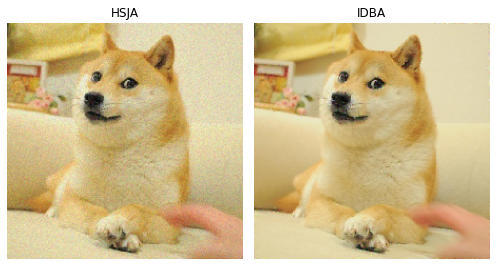

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(7, 5))
axs[0].imshow(adv_img_hsja)
axs[0].set_title('HSJA')
axs[0].axis('off')  # 隐藏坐标轴
axs[1].imshow(adv_img_idba)
axs[1].set_title('IDBA')
axs[1].axis('off')  # 隐藏坐标轴
plt.tight_layout()
plt.show()